In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.array([ [0,0], [0,1], [1,0], [1,1] ])
Y = np.array([ [0], [1], [1], [0] ])

In [6]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons1 = 10
        hiddenLayerNeurons2 = 5  # additional hidden layer
        outLayerNeurons = 1

        self.learning_rate = 0.2
        self.W_HI1 = np.random.randn(inputLayerNeurons, hiddenLayerNeurons1)
        self.W_H1H2 = np.random.randn(hiddenLayerNeurons1, hiddenLayerNeurons2)  # weights between hidden layers
        self.W_HO = np.random.randn(hiddenLayerNeurons2, outLayerNeurons)  # weights between the second hidden layer and the output layer

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden_input1 = np.dot(X, self.W_HI1)
        self.hidden_output1 = self.sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.hidden_output1, self.W_H1H2)
        self.hidden_output2 = self.sigmoid(hidden_input2)

        output_input = np.dot(self.hidden_output2, self.W_HO)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden2_error = output_delta.dot(self.W_HO.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden_output2, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H1H2.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden_output1, der=True)

        self.W_HI1 += X.T.dot(hidden1_delta)
        self.W_H1H2 += self.hidden_output1.T.dot(hidden2_delta)
        self.W_HO += self.hidden_output2.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

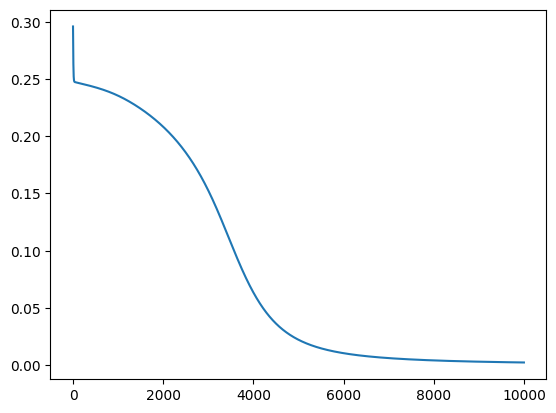

In [7]:
NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X, Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))
plt.plot(err)
plt.show()

In [8]:
print(NN.feedForward([0,0]))

[0.0425533]
